# Drinking age with a scikit-learn model

This example uses the regression discontinuity design to make claims about the causal effects of the minimum legal drinking age (21 in the USA) upon all cause mortality rates. The dataset is from a study by {cite:t}`carpenter2009effect`.

In [1]:
from sklearn.linear_model import LinearRegression

import causalpy as cp

In [2]:
df = (
    cp.load_data("drinking")
    .rename(columns={"agecell": "age"})
    .assign(treated=lambda df_: df_.age > 21)
    .dropna(axis=0)
)

In [3]:
result = cp.skl_experiments.RegressionDiscontinuity(
    df,
    formula="all ~ 1 + age + treated",
    running_variable_name="age",
    model=LinearRegression(),
    treatment_threshold=21,
)

## Examine results

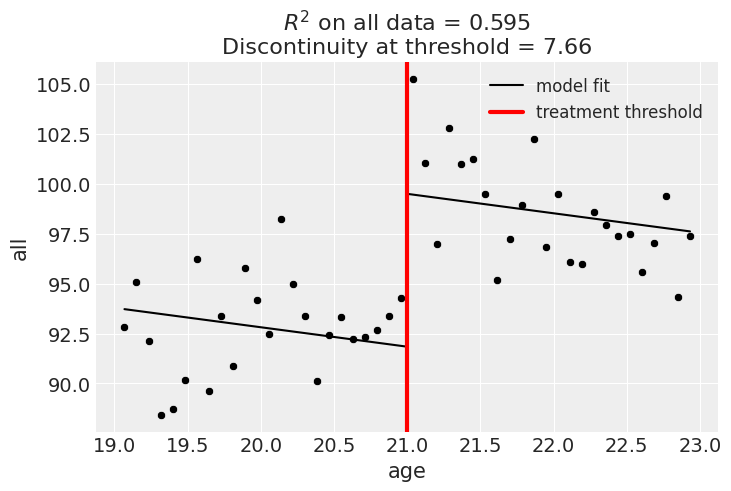

In [4]:
result.plot();

In [5]:
result.summary()

Difference in Differences experiment
Formula: all ~ 1 + age + treated
Running variable: age
Threshold on running variable: 21

Results:
Discontinuity at threshold = 7.66
Model coefficients:
	Intercept		0.0
	treated[T.True]		7.662711631820946
	age		-0.9746855447910273


## References
:::{bibliography}
:filter: docname in docnames
:::